In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [48]:
nyc_311_path = '/content/drive/MyDrive/Final_City_Comparison_Datasets/feature_nyc.csv' # nyc_full_clean
dc_311_path = '/content/drive/MyDrive/Final_City_Comparison_Datasets/feature_dc.csv'
aus_311_path = '/content/drive/MyDrive/Final_City_Comparison_Datasets/Austin_311_clean.csv'

In [53]:
nyc_df = pd.read_csv(nyc_311_path, index_col='day')

In [37]:
nyc_df= nyc_df.drop(nyc_df[nyc_df.day_till_fix < 0].index)

In [54]:
nyc_df.head()

,Unnamed: 0,CASE_COUNT,DEATH_COUNT,311_volume,311_seasonal,trend,weekday,crime_count,create_day,311_day_till_fix
day,,,,,,,,,,
2020-02-29,0,1,0,4128.0,419.437701,4165.428571,Saturday,18861.0,2020-02-29,2.875000
2020-03-01,1,0,0,3958.0,408.771035,4225.714286,Sunday,17631.0,2020-03-01,3.085690
2020-03-02,2,0,0,4010.0,-97.911923,4299.714286,Monday,18338.0,2020-03-02,4.984094
2020-03-03,3,1,0,4238.0,-100.628715,4283.285714,Tuesday,18787.0,2020-03-03,6.246798
2020-03-04,4,5,0,4367.0,-306.647512,4314.285714,Wednesday,19432.0,2020-03-04,5.238181


In [58]:
nyc_df.index = pd.to_datetime(nyc_df.index)

In [87]:
result=seasonal_decompose(nyc_df['311_volume'], model='additive')

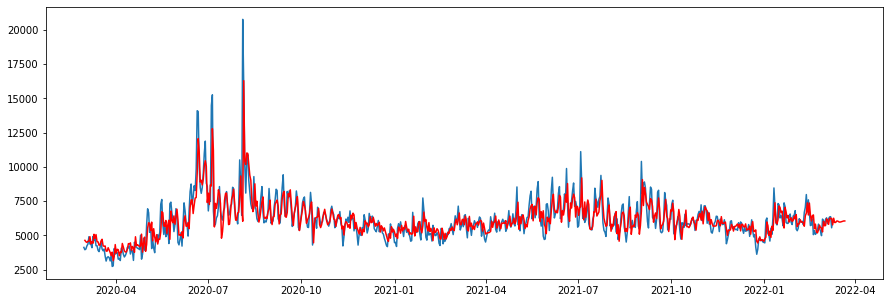

In [80]:
plt.figure(figsize=(15, 5))
plt.plot(nyc_df['311_volume'][:742])
plt.plot(arima.predict(1, 752), color="red")
plt.show()

In [84]:
forecast = arima.conf_int()

In [79]:
arima = ARIMA(nyc_df['311_volume'][:742], order = (7,0,2))
arima = arima.fit()
arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             311_volume   No. Observations:                  742
Model:                     ARMA(7, 2)   Log Likelihood               -6165.143
Method:                       css-mle   S.D. of innovations            980.934
Date:                Sun, 27 Mar 2022   AIC                          12352.286
Time:                        19:53:56   BIC                          12402.989
Sample:                    02-29-2020   HQIC                         12371.833
                         - 03-11-2022                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6083.1839    256.464     23.719      0.000    5580.524    6585.844
ar.L1.311_volume     1.7928      0.067     26.717      0.000       1.661       1.924
ar.L2.311_volume    -1.7611      0.107    -16.408      0.000      -1.971      -1.551
ar.L3.311_volume     0.9094      0.108      8.398      0.000       0.697       1.122
ar.L4.311_volume    -0.2006      0.106     -1.894      0.059      -0.408       0.007
ar.L5.311_volume    -0.0118      0.101     -0.118      0.906      -0.209       0.185
ar.L6.311_volume     0.1929      0.078      2.461      0.014       0.039       0.346
ar.L7.311_volume    -0.0197      0.042     -0.472      0.637      -0.102       0.062
ma.L1.311_volume    -1.1194      0.057    -19.780      0.000      -1.230      -1.008
ma.L2.311_volume     0.8294      0.047     17.574      0.000       0.737       0.922
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0737           -0.0000j            1.0737           -0.0000
AR.2            0.6331           -0.8031j            1.0227           -0.1437
AR.3            0.6331           +0.8031j            1.0227            0.1437
AR.4           -0.0004           -1.4551j            1.4551           -0.2500
AR.5           -0.0004           +1.4551j            1.4551            0.2500
AR.6           -2.2100           -0.0000j            2.2100           -0.5000
AR.7            9.6639           -0.0000j            9.6639           -0.0000
MA.1            0.6748           -0.8662j            1.0980           -0.1447
MA.2            0.6748           +0.8662j            1.0980            0.1447
-----------------------------------------------------------------------------
"""

In [ ]:
nyc_311_path = '/content/drive/MyDrive/Final_City_Comparison_Datasets/nyc_all_clean.csv' # nyc_full_clean

In [ ]:
nyc_df = pd.read_csv(nyc_311_path, index_col='day')
nyc_df= nyc_df.drop(nyc_df[nyc_df.day_till_fix < 0].index)

In [13]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(nyc_df[['ward']])
nyc_df[one_hot.categories_[0]] = encoded.toarray()

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(nyc_df[['agency']])
nyc_df[one_hot.categories_[0]] = encoded.toarray()

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(nyc_df[['complaint_type']])
nyc_df[one_hot.categories_[0]] = encoded.toarray()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# label encoding for categorical data

# nyc_df['ward'] = nyc_df["ward"].astype('category')
# nyc_df['agency'] = nyc_df["agency"].astype('category')
# nyc_df['complaint_type'] = nyc_df["complaint_type"].astype('category')
nyc_df.drop(columns=['day', 'complaint_type', 'ward', 'agency', 'weekday', 'channel', '311_volume', 'Unnamed: 0', 'create_ordinal'], inplace=True)


In [17]:
nyc_df = nyc_df.loc[:, nyc_df.columns.notna()]

In [18]:
nyc_df = nyc_df.dropna()

In [19]:
nyc_df.shape

(3757467, 49)

In [20]:
# split data
X = nyc_df.drop(columns='day_till_fix')
y = nyc_df['day_till_fix']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

def bayesian_model(type, x_train, y_train, x_test, y_test):
  models = []
  train_accuracies = []
  test_accuracies = []
  rmses = []

  alphas = [1, 0.5, 0.1, 0.05, 0.02, 0.01, 0]
  
  for a in alphas:
    if type == 'Lasso':
      model = Lasso(alpha=a, fit_intercept=True, normalize=True)
    elif type == 'Ridge':
      model = Ridge(alpha=a, fit_intercept=True, normalize=True)
    elif type == 'ElasticNet':
      model = ElasticNet(alpha=a, fit_intercept=True, normalize=True)
    model.fit(x_train, y_train)
    models.append(model)
    y_pred = model.predict(x_test)

    train_accuracies.append(model.score(x_train, y_train))
    test_accuracies.append(model.score(x_test, y_test))
    rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))

  # plot accuracy
  fig = plt.figure(figsize=(10,3))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  ax1.plot(alphas, train_accuracies, label='train_accuracy')
  ax1.plot(alphas, test_accuracies, '--', label='test_accuracy')
  ax1.title.set_text('{} Model Train & Test Accuracy'.format(type))
  ax1.legend()
  
  # plot loss
  ax2.plot(alphas, rmses, label='RMSE')
  ax2.legend()
  ax2.title.set_text('{} Model Loss'.format(type))
  plt.show()

  # index of best result
  i = rmses.index(min(rmses))
  print('Best performance at alpha={}: Train R^2 {}, Test R^2 {}, RMSE {}'.\
        format(alphas[i], train_accuracies[i], test_accuracies[i], rmses[i]))
  return models[i]

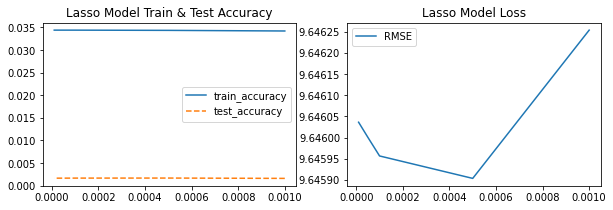

Best result at alpha=0.0005: Train R^2 0.03434652053490905, Test R^2 0.001689639094064721, RMSE 9.64590350631908


Lasso(alpha=0.0005, normalize=True)

In [ ]:
bayesian_model('Lasso', x_train, y_train, x_test, y_test)

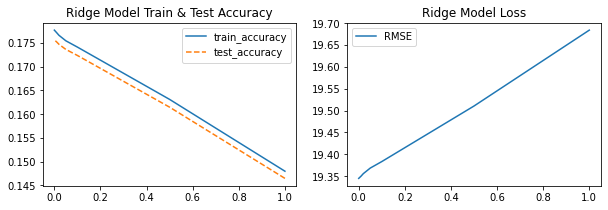

Best performance at alpha=0: Train R^2 0.1776624906425187, Test R^2 0.17561110906555533, RMSE 19.345086366365415


In [33]:
ridge = bayesian_model('Ridge', x_train, y_train, x_test, y_test)

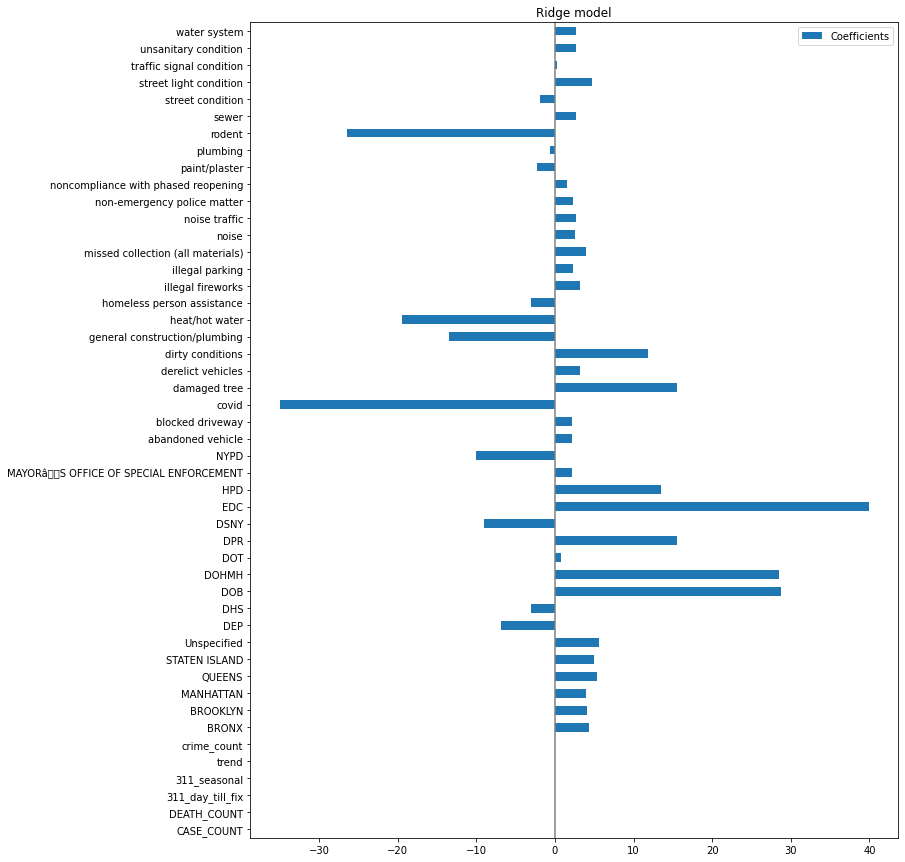

In [36]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   ridge.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(15, 15))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

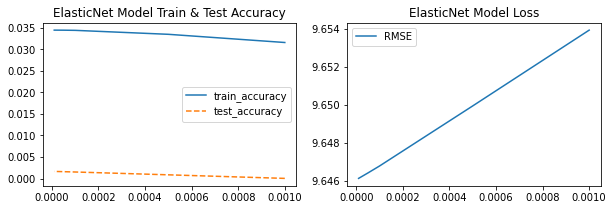

Best result at alpha=1e-05: Train R^2 0.03439814869165403, Test R^2 0.0016457422596136695, RMSE 9.646115574625398


ElasticNet(alpha=1e-05, normalize=True)

In [ ]:
bayesian_model('ElasticNet', x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(x_train, y_train, x_test, y_test):
  models = []
  train_accuracies = []
  test_accuracies = []
  rmses = []

  max_depths = range(2, 30, 2)
  for d in max_depths:
    model = RandomForestRegressor(max_depth=d, n_estimators=500, random_state=42)
    model.fit(x_train, y_train);
    models.append(model)
    y_pred = model.predict(x_test)

    train_accuracies.append(model.score(x_train, y_train))
    test_accuracies.append(model.score(x_test, y_test))
    rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))

  # plot accuracy
  fig = plt.figure(figsize=(10,3))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  ax1.plot(max_depths, train_accuracies, label='train_accuracy')
  ax1.plot(max_depths, test_accuracies, '--', label='test_accuracy')
  ax1.title.set_text('Random Forest Model Train & Test Accuracy'.format(type))
  ax1.legend()

  # plot loss
  ax2.plot(max_depths, rmses, label='RMSE')
  ax2.legend()
  ax2.title.set_text('Random Forest Model Loss'.format(type))
  plt.show()

  # index of best result
  i = rmses.index(min(rmses))
  print('Best performance with max_depth={}: Train R^2 {}, Test R^2 {}, RMSE {}'.\
        format(max_depths[i], train_accuracies[i], test_accuracies[i], rmses[i]))
  return models[i]

In [ ]:
models = random_forest(x_train, y_train, x_test, y_test)

In [ ]:
models = []
train_accuracies = []
test_accuracies = []
rmses = []


In [ ]:

d = 20
model = RandomForestRegressor(max_depth=d, n_estimators=500, random_state=42)
model.fit(x_train, y_train);
models.append(model)
y_pred = model.predict(x_test)

train_accuracies.append(model.score(x_train, y_train))
test_accuracies.append(model.score(x_test, y_test))
rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))
